# 0808 시도

## 1차

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/와이빅타/여름방학-2학기/2차 프로젝트/data/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/와이빅타/여름방학-2학기/2차 프로젝트/data/test.csv')

train_prepro = train.copy()
test_prepro = test.copy()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### 전처리

히스토그램 나타내기

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


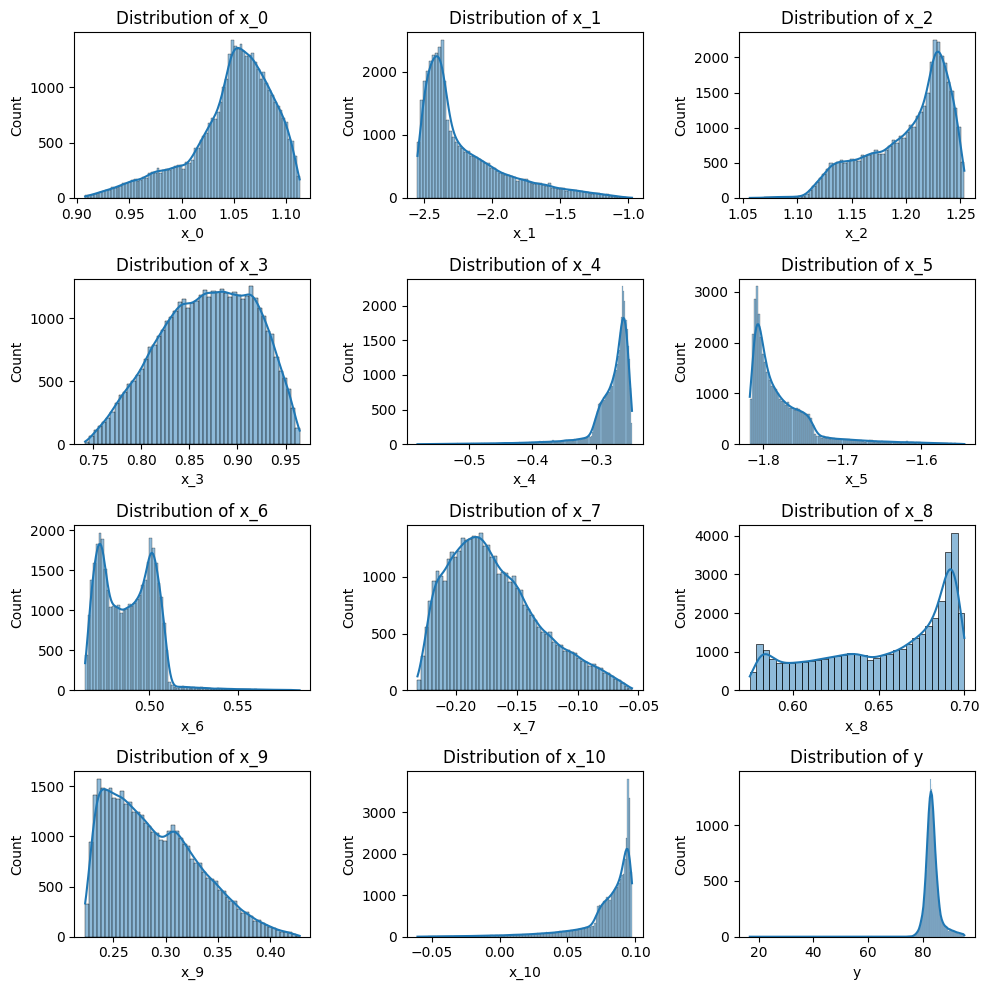

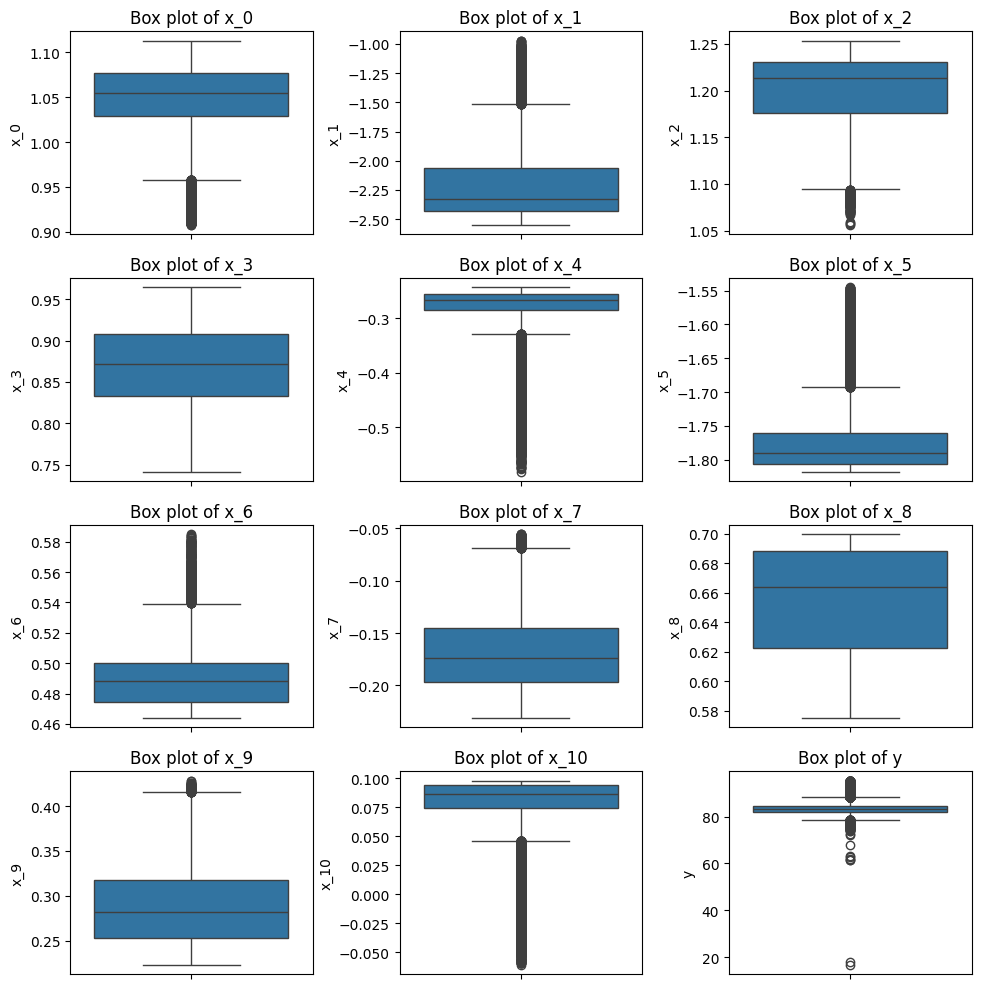

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Create histograms for each variable
fig, axes = plt.subplots(4, 3, figsize=(10, 10))
axes = axes.ravel()

for i, col in enumerate(train_prepro.columns[1:]):  # Skip the ID column
    sns.histplot(train_prepro[col], ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

# Create box plots for each variable
fig, axes = plt.subplots(4, 3, figsize=(10, 10))
axes = axes.ravel()

for i, col in enumerate(train_prepro.columns[1:]):  # Skip the ID column
    sns.boxplot(y=train_prepro[col], ax=axes[i])
    axes[i].set_title(f'Box plot of {col}')

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


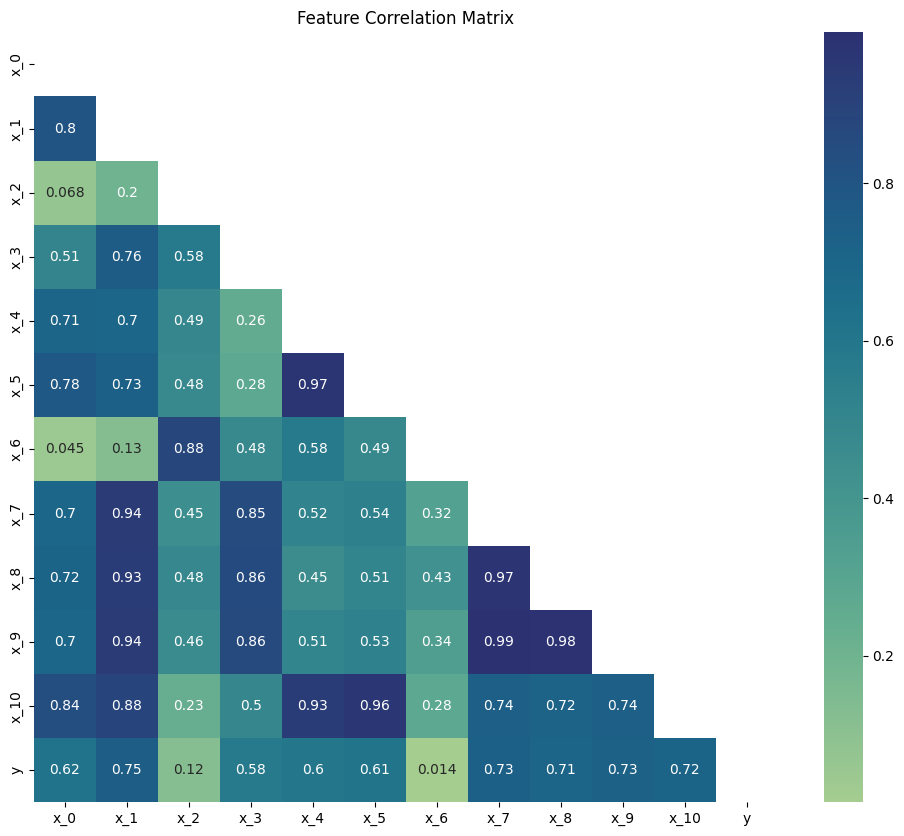

In [ ]:
# Check for correlations
correlation_matrix = train_prepro.iloc[:, 1:].corr()
abs_corr_matrix = np.abs(correlation_matrix)
mask = np.zeros_like(abs_corr_matrix, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(12, 10))
sns.heatmap(abs_corr_matrix, annot=True, cmap='crest', mask = mask)
plt.title('Feature Correlation Matrix')
plt.show()


In [ ]:
# train_prepro = train_prepro.drop(columns = ['x_10', 'x_9', 'x_5'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


히스토그램만 봤을 때 비슷한 거
2-6, **4-5-10** 1-7-9, 8, 0-3



0.9 이상의 상관관계
* x1 - x4, x5, x7, x8, x9, x10
> x0 x2 x3 x6 얘네는 다른 분류

* x2 - x4, x5, x6, x10

* x4 - x5

* 7-8,9,10

* 8-9

* 9-10

In [ ]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np

def calc_vif(df):
    # 숫자형 데이터만 선택
    df = df.select_dtypes(include=[np.number])

    # 결측값을 0으로 대체 (또는 다른 방법으로 대체)
    df = df.fillna(0)

    # VIF 계산
    vif = pd.DataFrame()
    vif["variables"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif

# 사용 예시
# train_prepro = ... (데이터프레임을 여기에서 정의해야 합니다)
vif_df = calc_vif(train_prepro)
print(vif_df)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


   variables           VIF
0        x_0   2839.424217
1        x_1   1473.198194
2        x_2  20161.276151
3        x_3   1467.552242
4        x_4   3105.882849
5        x_5  64403.374098
6        x_6  18421.527824
7        x_7   1483.403229
8        x_8  40133.144546
9        x_9   6459.887301
10      x_10   1124.055680
11         y   2464.979758


### 변수 선택

In [ ]:
train_prepro = train_prepro[(train_prepro['x_2'] > 1.1)]
train_prepro = train_prepro[(train_prepro['x_4'] > -0.4)]
train_prepro = train_prepro[(train_prepro['x_5'] < -1.65)]
train_prepro = train_prepro[(train_prepro['x_6'] < 0.53)]
train_prepro = train_prepro[(train_prepro['x_10'] > 0)]
train_prepro = train_prepro[(train_prepro['y'] > 20)]

train_x = train_prepro.drop(columns = ['ID', 'y'])
train_y = train_prepro['y']
test_x = test_prepro.drop(columns = 'ID')

X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.3,
                                                    shuffle=True,random_state=RANDOM_SEED)

X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import pandas as pd
from sklearn.decomposition import PCA

scale = StandardScaler()
train_scaled = scale.fit_transform(X_train)
test_scaled = scale.transform(X_test)
final_scaled = scale.transform(test_x)

train_scaled = pd.DataFrame(train_scaled, columns=X_train.columns)
test_scaled = pd.DataFrame(test_scaled, columns=X_test.columns)
final_scaled = pd.DataFrame(final_scaled, columns=test_x.columns)

# 만약 X_train, X_test가 DataFrame일 경우 Numpy 배열로 변환
X_train_np = np.array(train_scaled)
X_test_np = np.array(test_scaled)
test_x_np = np.array(final_scaled)

# PCA 적용
pca = PCA(n_components=1)
X_pca_train = pca.fit_transform(X_train_np[:, [3, 4, 9]])
X_pca_test = pca.transform(X_test_np[:, [3, 4, 9]])
final_pca = pca.transform(test_x_np[:, [3, 4, 9]])

# PCA 결과를 데이터프레임으로 변환하고 변수 이름 지정
X_pca_train_df = pd.DataFrame(X_pca_train, columns=['x_pca'])
X_pca_test_df = pd.DataFrame(X_pca_test, columns=['x_pca'])
final_pca_df = pd.DataFrame(final_pca, columns=['x_pca'])


# 원래 변수 x4, x5, x10을 제거하고, PCA 변수를 추가
X_train = train_scaled.join(X_pca_train_df)
X_test = test_scaled.join(X_pca_test_df)
final_x = final_scaled.join(final_pca_df)

# 결과 확인
X_train.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_pca
0,0.242498,-0.772676,0.272687,-0.318320,0.698487,-0.839205,-0.102979,-0.122573,0.325148,-0.112059,0.899663,-0.496347
1,-0.070552,-0.737467,-0.849077,-0.116726,0.126158,-0.154441,1.339708,-0.671847,0.894767,-0.900532,0.488601,-0.735318
2,-1.800028,1.639059,0.805202,0.955169,-1.189162,1.534604,-0.575632,1.517031,-1.790482,1.585681,-1.816238,2.078941
3,-0.083133,-1.100083,-1.690154,-0.911067,-0.617850,0.653388,1.530030,-1.134287,1.180586,-1.264267,-0.096943,-1.287586
4,0.543734,-0.185535,1.181952,0.203507,0.588913,-0.680456,-1.162732,0.191608,-0.440731,0.468957,0.359191,0.281220


In [ ]:
X_train = X_train.drop(columns  = ['x_5', 'x_8'])
X_test = X_test.drop(columns  = ['x_5', 'x_8'])
final_x = final_x.drop(columns  = ['x_5', 'x_8'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### optuna

In [ ]:
import optuna
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Random Forest Hyperparameter Optimization
def objective_rf(trial):
    n_estimators = trial.suggest_int('n_estimators', 50, 300)
    max_depth = trial.suggest_int('max_depth', 5, 50)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)
    max_features = trial.suggest_float('max_features', 0.05, 0.7)


    model = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features = max_features,
        random_state=RANDOM_SEED
    )

    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    mse = mean_squared_error(y_test, preds)

    return mse

study_rf = optuna.create_study(direction='minimize')
study_rf.optimize(objective_rf, n_trials=50)

print('Best parameters for Random Forest:', study_rf.best_params)
print('Best MSE for Random Forest:', study_rf.best_value)

best_params_rf = study_rf.best_params
best_model_rf = RandomForestRegressor(
    n_estimators=best_params_rf['n_estimators'],
    max_depth=best_params_rf['max_depth'],
    min_samples_split=best_params_rf['min_samples_split'],
    min_samples_leaf=best_params_rf['min_samples_leaf'],
    max_features = best_params_rf['max_features'],
    random_state=RANDOM_SEED
)

# XGBoost Hyperparameter Optimization
def objective_xgb(trial):
    n_estimators = trial.suggest_int('n_estimators', 50, 300)
    max_depth = trial.suggest_int('max_depth', 3, 30)
    learning_rate = trial.suggest_float('learning_rate', 0.01, 0.3)
    colsample_bytree = trial.suggest_float('colsample_bytree', 0.1, 1.0)
    subsample = trial.suggest_float('subsample', 0.5, 1.0)

    model = XGBRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        learning_rate=learning_rate,
        colsample_bytree=colsample_bytree,
        subsample=subsample,
        random_state=RANDOM_SEED
    )

    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    mse = mean_squared_error(y_test, preds)

    return mse

study_xgb = optuna.create_study(direction='minimize')
study_xgb.optimize(objective_xgb, n_trials=100)

print('Best parameters for XGBoost:', study_xgb.best_params)
print('Best MSE for XGBoost:', study_xgb.best_value)

best_params_xgb = study_xgb.best_params
best_model_xgb = XGBRegressor(
    n_estimators=best_params_xgb['n_estimators'],
    max_depth=best_params_xgb['max_depth'],
    learning_rate=best_params_xgb['learning_rate'],
    colsample_bytree=best_params_xgb['colsample_bytree'],
    subsample=best_params_xgb['subsample'],
    random_state=RANDOM_SEED
)

# 보팅 앙상블 구성
voting_regressor = VotingRegressor(
    estimators=[
        ('rf', best_model_rf),
        ('xgb', best_model_xgb),
        ('lr', LinearRegression())
    ]
)

# 앙상블 모델 학습
voting_regressor.fit(X_train, y_train)

# 예측 및 성능 평가
preds = voting_regressor.predict(X_test)
final_mse = mean_squared_error(y_test, preds)

print('Final MSE for Voting Ensemble with Feature Engineering:', final_mse)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[I 2024-08-08 13:20:36,493] A new study created in memory with name: no-name-603750af-2d2a-479a-8af4-8e05a29d9727
[I 2024-08-08 13:21:11,721] Trial 0 finished with value: 2.4003484254130574 and parameters: {'n_estimators': 201, 'max_depth': 13, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 0.4557393291877348}. Best is trial 0 with value: 2.4003484254130574.
[I 2024-08-08 13:21:59,571] Trial 1 finished with value: 2.4282383133286403 and parameters: {'n_estimators': 220, 'max_depth': 48, 'min_samples_split': 4, 'min_samples_leaf': 5, 'max_features': 0.5799653243954115}. Best is trial 0 with value: 2.4003484254130574.
[I 2

Best parameters for Random Forest: {'n_estimators': 153, 'max_depth': 8, 'min_samples_split': 20, 'min_samples_leaf': 10, 'max_features': 0.351520695742873}
Best MSE for Random Forest: 2.3774405890748476


[I 2024-08-08 13:33:39,917] Trial 0 finished with value: 2.6405032517471767 and parameters: {'n_estimators': 293, 'max_depth': 30, 'learning_rate': 0.19157956317936037, 'colsample_bytree': 0.18152596830518147, 'subsample': 0.9674854120875938}. Best is trial 0 with value: 2.6405032517471767.
[I 2024-08-08 13:33:44,091] Trial 1 finished with value: 2.5477592660168633 and parameters: {'n_estimators': 268, 'max_depth': 7, 'learning_rate': 0.23773092130608844, 'colsample_bytree': 0.14579787675334, 'subsample': 0.7458992303027353}. Best is trial 1 with value: 2.5477592660168633.
[I 2024-08-08 13:34:23,818] Trial 2 finished with value: 2.552773955119935 and parameters: {'n_estimators': 138, 'max_depth': 20, 'learning_rate': 0.03740519656440138, 'colsample_bytree': 0.7046769104616579, 'subsample': 0.8091801324605936}. Best is trial 1 with value: 2.5477592660168633.
[I 2024-08-08 13:34:46,571] Trial 3 finished with value: 2.7949298337527817 and parameters: {'n_estimators': 228, 'max_depth': 21,

Best parameters for XGBoost: {'n_estimators': 59, 'max_depth': 3, 'learning_rate': 0.1434012786690109, 'colsample_bytree': 0.5239618474489224, 'subsample': 0.7895290585852076}
Best MSE for XGBoost: 2.37930730871819
Final MSE for Voting Ensemble with Feature Engineering: 2.367300676176709


### 예측

In [ ]:
prediction = voting_regressor.predict(final_x)

pred_df = pd.DataFrame(prediction, columns=['y'])

# 결과 출력
pred_df.to_csv('prediction_2.csv', index=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


최종 스코어 : 0.728